<a href="https://colab.research.google.com/github/Tanaya12-da/Butter-Bot-Explorer/blob/main/AI_32126894.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all the libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import copy

2. Creating a Table Environment and applying A* search, Deepening Search

In [ ]:
import heapq

class TableEnvironment:
  #defining positions
    def __init__(self, matrix):
        self.matrix = matrix
        self.robot = self.find_symbol('r')
        self.customer = self.find_symbol('p')
        self.butter = self.find_symbol('b')
        self.obstacle_symbol = 'x'

    #calculating heuristic
    def heuristic(self, node, goal):
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1]) #manhattan distance

    #check whether the coordinates are present in the range of matrix or not
    def is_valid(self, x, y):
        rows, cols = len(self.matrix), len(self.matrix[0])
        return 0 <= x < rows and 0 <= y < cols and self.matrix[x][y] != self.obstacle_symbol

    #valid neighbours near the given coordinates
    def neighbors(self, x, y):
        possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Possible movements: up, down, left, right
        neighbors = [(x + dx, y + dy) for dx, dy in possible_moves]
        return [(nx, ny) for nx, ny in neighbors if self.is_valid(nx, ny)]


    #finding the r,p,b in the matrix
    def find_symbol(self, symbol):
        for i, row in enumerate(self.matrix):
            for j, cell in enumerate(row):
                if symbol in cell:
                    return i, j
        return None

    ##Implementing the A* search
    def search(self, start, goal):
        open_set = [(0, start)]  # Priority queue (heap) to store nodes to be explored
        came_from = {}  # Dictionary to store the parent of each node
        g_score = {start: 0}  # Cost from start to each node

        while open_set:
            current_cost, current_node = heapq.heappop(open_set)

            if current_node == goal:
                path = [current_node]
                while current_node in came_from:
                    current_node = came_from[current_node]
                    path.append(current_node)
                return path[::-1]

            for neighbor in self.neighbors(*current_node):
                tentative_g_score = g_score[current_node] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current_node

        return None  # No path found

    # Implementing Iterative Deepening Search
    def iterative_deepening_search(self, start, goal, max_depth):
        for depth in range(1, max_depth + 1):
            result = self.depth_limited_search(start, goal, depth)
            if result:
                return result
        return None

    def depth_limited_search(self, start, goal, max_depth):
        open_set = [(0, start)]  # Priority queue (heap) to store nodes to be explored
        came_from = {}  # Dictionary to store the parent of each node
        g_score = {start: 0}  # Cost from start to each node

        while open_set:
            current_cost, current_node = heapq.heappop(open_set)

            if current_node == goal:
                path = [current_node]
                while current_node in came_from:
                    current_node = came_from[current_node]
                    path.append(current_node)
                return path[::-1]

            if g_score[current_node] >= max_depth:
                continue

            for neighbor in self.neighbors(*current_node):
                tentative_g_score = g_score[current_node] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current_node

        return None  # No path found





# def iterative_deepening_search(initial_state, max_depth=100):
#       for depth in range(max_depth):
#         result = depth_limited_search(initial_state, depth)
#         if result is not None:
#             return result
#             return None

# def depth_limited_search(state, depth_limit):
#     return recursive_dls(state, depth_limit)


# def recursive_dls(state, depth_limit):
#     if state == goal:
#         return [state]

#     if depth_limit == 0:
#         return None

#     for neighbor in state.get_neighbors():
#         result = recursive_dls(neighbor, depth_limit - 1)
#         if result is not None:
#             return [state] + result

#     return None


# def reconstruct_path(final_state):
#     path = [final_state]
#     current_state = final_state

#     while current_state != start:
#         for neighbor in current_state.get_neighbors():
#             if neighbor == path[-1]:
#                 path.append(neighbor)
#                 current_state = neighbor
#                 break

    # return path[::-1]

3. Input to the class

In [ ]:
matrix_input = [
    ['2', '2', '2', '2', '2'],
    ['2r', '1', '1', '1', '2'],
    ['2', '1', '1b', '1', '2'],
    ['2', '1', 'x', '1', '2'],
    ['2', '2', '2p', '2', '2']
]

table_env = TableEnvironment(matrix_input)
path_to_butter = table_env.search(table_env.robot, table_env.butter)

if path_to_butter:
    print("Path to Butter:", path_to_butter)
    path_to_customer = table_env.search(table_env.butter, table_env.customer)
    if path_to_customer:
        print("Path to Customer:", path_to_customer)
        final_path = path_to_butter + path_to_customer[1:]
        print("Final Path:", final_path)
    else:
        print("No path to customer.")
else:
    print("No path to butter.")


Path to Butter: [(1, 0), (1, 1), (1, 2), (2, 2)]
Path to Customer: [(2, 2), (2, 1), (3, 1), (4, 1), (4, 2)]
Final Path: [(1, 0), (1, 1), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2)]


4. Evaluating the A* search

In [ ]:
def a_star_search_evaluation(path_found, optimal_path):
    """
    Evaluate the accuracy of the A* Search algorithm.

    Parameters:
    - path_found: The path found by the A* Search algorithm.
    - optimal_path: The optimal path (ground truth).

    Returns:
    - completeness: 1.0 if path_found is equal to optimal_path, else 0.0.
    """
    completeness = 1.0 if path_found == optimal_path else 0.0
    return completeness

# Example usage:
optimal_path = [(0, 0), (1, 0), (2, 0), (3, 0)]  # Replace with the actual optimal path
path_found_by_a_star = [(1, 0), (1, 1), (1, 2), (2, 2)]  # Replace with the path found by A* Search

completeness_score = a_star_search_evaluation(path_found_by_a_star, optimal_path)
print(f"Completeness Score: {completeness_score}")


Completeness Score: 0.0


5. Visualizing the path on the matrix

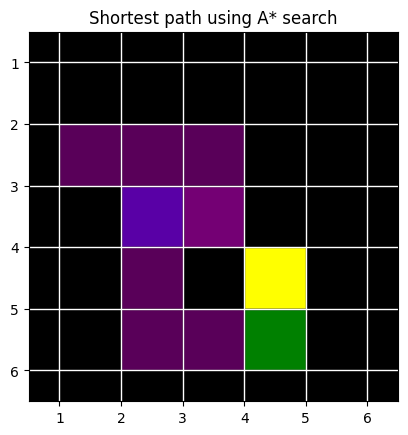

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 6x6 matrix (corrected size)
matrix = np.zeros((6, 6))

# Set positions of robot, butter, obstacle, and customer
robot_pos = (2, 1)
butter_pos = (3, 3)
obstacle_pos = (4, 3)
customer_pos = (4, 3)  # Corrected position

# Assign values to matrix positions
matrix[robot_pos] = 1  # 1 represents the robot
matrix[butter_pos] = 2  # 2 represents the butter
matrix[obstacle_pos] = 3  # 3 represents the obstacle
matrix[customer_pos] = 4  # 4 represents the customer

# Paths
path_to_butter = [(1, 0), (1, 1), (1, 2), (2, 2)]
path_to_customer = [(2, 2), (2, 1), (3, 1), (4, 1), (4, 2)]
final_path = path_to_butter + path_to_customer

# Plot the matrix
fig, ax = plt.subplots()
ax.imshow(np.ones_like(matrix), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')

# Add colored rectangles for robot, butter, obstacle, and customer
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] == 1:  # Robot
            color = 'blue'
        elif matrix[i, j] == 2:  # Butter
            color = 'yellow'
        elif matrix[i, j] == 3:  # Obstacle
            color = 'white'
        elif matrix[i, j] == 4:  # Customer
            color = 'green'
        else:
            continue

        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Add gridlines
ax.set_xticks(np.arange(matrix.shape[1]), minor=False)
ax.set_yticks(np.arange(matrix.shape[0]), minor=False)
ax.grid(which='both', color='white', linestyle='-', linewidth=1)

# Add numbers on the matrix axis
ax.set_xticklabels(np.arange(matrix.shape[1]) + 1)  # Add 1 to start the numbering from 1
ax.set_yticklabels(np.arange(matrix.shape[0]) + 1)  # Add 1 to start the numbering from 1

# Plot the paths
for path, color in zip([final_path], ['purple']):
    for position in path:
        rect = plt.Rectangle((position[1], position[0]), 1, 1, facecolor=color, edgecolor='black', alpha=0.7)
        ax.add_patch(rect)
plt.title("Shortest path using A* search")
# Show the plot
plt.show()


6. Applying Iterative deepening search algorithm on the input matrix

In [ ]:
# Assuming you have an instance of TableEnvironment called table_env
start = table_env.robot
goal = table_env.butter
max_depth = 10  # Adjust the maximum depth as needed

result = table_env.iterative_deepening_search(start, goal, max_depth)

if result:
    print("Path found:", result)
else:
    print("No path found within the specified depth limit.")


Path found: [(1, 0), (1, 1), (1, 2), (2, 2)]


7. Visualisation

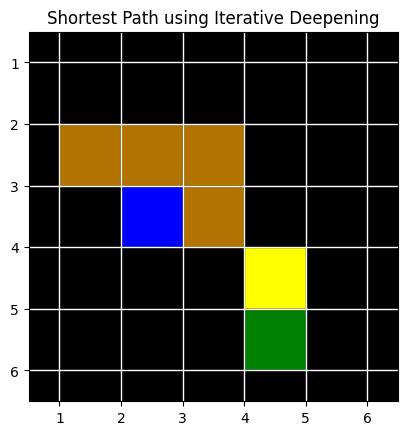

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 6x6 matrix (corrected size)
matrix = np.zeros((6, 6))

# Set positions of robot, butter, obstacle, and customer
robot_pos = (2, 1)
butter_pos = (3, 3)
obstacle_pos = (4, 3)
customer_pos = (4, 3)  # Corrected position

# Assign values to matrix positions
matrix[robot_pos] = 1  # 1 represents the robot
matrix[butter_pos] = 2  # 2 represents the butter
matrix[obstacle_pos] = 3  # 3 represents the obstacle
matrix[customer_pos] = 4  # 4 represents the customer

# Path
path_found = [(1, 0), (1, 1), (1, 2), (2, 2)]

# Plot the matrix
fig, ax = plt.subplots()
ax.imshow(np.ones_like(matrix), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')

# Add colored rectangles for robot, butter, obstacle, and customer
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] == 1:  # Robot
            color = 'blue'
        elif matrix[i, j] == 2:  # Butter
            color = 'yellow'
        elif matrix[i, j] == 3:  # Obstacle
            color = 'white'
        elif matrix[i, j] == 4:  # Customer
            color = 'green'
        else:
            continue

        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Add gridlines
ax.set_xticks(np.arange(matrix.shape[1]), minor=False)
ax.set_yticks(np.arange(matrix.shape[0]), minor=False)
ax.grid(which='both', color='white', linestyle='-', linewidth=1)

# Add numbers on the matrix axis
ax.set_xticklabels(np.arange(matrix.shape[1]) + 1)  # Add 1 to start the numbering from 1
ax.set_yticklabels(np.arange(matrix.shape[0]) + 1)  # Add 1 to start the numbering from 1

# Plot the found path
for position in path_found:
    rect = plt.Rectangle((position[1], position[0]), 1, 1, facecolor='orange', edgecolor='black', alpha=0.7)
    ax.add_patch(rect)
plt.title("Shortest Path using Iterative Deepening")
# Show the plot
plt.show()
